# Probabilidades Contraintuitivas

A veces las probabilidades y estadisticas suelen ser contraintuitivas y dificiles de entender. El objetivo de esta practica es utilizar la programacion como herramienta para poder simularlas y aceptar los resultados que parecen imposibles de entender.

### Problema para escuela primaria

Un juego de LEGO contiene piezas de 4 colores diferentes. El siguiente grafico muestra el porcentaje de piezas de cada color:

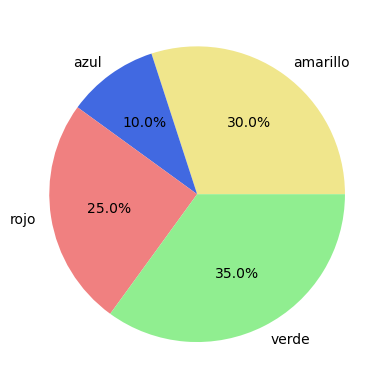

In [1]:
#@title {display-mode:"form"}
# Codigo para generar el grafico. Veremos como funciona en el curso de Ciencia de Datos
import matplotlib.pyplot as plt
plt.pie([30, 10, 25, 35], labels=['amarillo', 'azul', 'rojo', 'verde'], colors=['khaki', 'royalblue', 'lightcoral', 'lightgreen'], autopct='%1.1f%%');

*Bob dice:* "Voy a sacar una cantidad igual de piezas de cada color. Luego voy a calcular nuevamente el porcentaje de cada color."

*Alicia dice:* "No importa el numero de piezas que saques, la cantidad de piezas rojas siempre va a ser 25% del total."

**Comprobar si esto es cierto o no.**

In [ ]:
# Escribir aqui la solucion



In [ ]:
#@title Solucion Problema para escuela primaria {display-mode:"form"}

#supongamos que hay 100 piezas en total

azules = 10
amarillas = 30
verdes = 35
rojas = 25

porcentaje_rojas = rojas / (azules+amarillas+verdes+rojas)
print(porcentaje_rojas)

# saquemos de a una pieza a la vez y recalculemos el porcentaje de rojas hasta que las azules lleguen a cero

while azules > 0:
    azules = azules - 1
    amarillas = amarillas - 1
    verdes = verdes - 1
    rojas = rojas - 1
    
    porcentaje_rojas = rojas / (azules+amarillas+verdes+rojas)
    print(porcentaje_rojas)

### La falacia del apostador

Es fácil darse cuenta que en el casino es muy difícil que en la ruleta salga 10 veces seguidas el rojo. La pregunta aquí es, si han salido 9 rojos seguidos es entonces más probable que en la siguiente tirada salga negro?

La respuesta es NO. Si bien la probabilidad de que salgan 10 rojos seguidos es 0.5^10, la probabilidad de que salga rojo o negro luego de que ya han salido 9 rojos es 0.5. Suponemos que no hay cero verde.
Esto se debe a que la probabilidad de algo que ya ha ocurrido es siempre 1.


In [ ]:
# Escribir aqui la solucion



In [ ]:
#@title Solucion Simulacion La falacia del apostador {display-mode:"form"}

import random
n = 10 #numero de veces seguidas que quiero que salga negro
total_intentos = 100000 #total de intentos a simular
n_negros_seguidos_contador = 0 #cantidad de veces que salio n veces seguidas negro
rojo_despues_de_n_negros_contador = 0 #cantidad de veces que salio rojo 
# numero de intentos
for intento in range(total_intentos):
    contador = 0
    r = random.randrange(2) # 0 es negro 1 es rojo
    while r == 0 and contador < 5:
        r = random.randrange(2)
        contador += 1
    if contador == 5:
        n_negros_seguidos_contador += 1
        r = random.randrange(2)
        if r == 1:
            rojo_despues_de_n_negros_contador += 1

print(f"Total de intentos: {total_intentos}")
print(f"Cantidad de veces que salieron {n} negros seguidos: {n_negros_seguidos_contador}")
prob_n_negros = n_negros_seguidos_contador/total_intentos
print(f"Probabilidad de {n} negros seguidos: {prob_n_negros}")
print(f"Cantidad de veces que salio rojo luego de {n} negros seguidos: {rojo_despues_de_n_negros_contador}")
prob_rojo_despues_de_n_negros = rojo_despues_de_n_negros_contador/n_negros_seguidos_contador
print(f"Probabilidad rojo luego de {n} negros seguidos: {prob_rojo_despues_de_n_negros}")

### El problema de Monty Hall (o de las tres puertas)
Un participante debe elegir entre tres puertas. Detrás de una de ellas hay un automóvil como premio y en las otras dos hay cabras. Una vez que el participante elige una puerta el conductor abre una de las puertas donde hay una cabra y le pregunta al participante si quiere cambiar la puerta elegida. ¿Le conviene al participante cambiar de puerta?

La respuesta es SÍ. Sí conviene cambiar de puerta porque aumento mi probabilidad de 0.33 a 0.66. Esto se debe a que el conductor al abrir la puerta me da más información y si bien al principio mi probabilidad de adivinar era 1/3 una vez que abre la puerta con una cabra si cambio de puerta ganaría si al principio me hubiese equivocado y mi probabilidad de equivocarme al principio era 2/3.

In [ ]:
# Escribir aqui la solucion



In [ ]:
#@title Solucion Simulacion Problema de las tres puertas {display-mode:"form"}
import random
total_intentos = 10000 #total de intentos a simular
gano_cambiando = 0
gano_sin_cambiar = 0
# numero de intentos
for intento in range(total_intentos):
    puertas = [0,0,0] #inicializamos las puertas con todas cabras (0 = cabra, 1 = auto)
    puerta_del_auto = random.randrange(3) #numero de la puerta donde estara el auto
  
    puertas[puerta_del_auto] = 1 #asignamos el auto a la puerta elegida aleatoriamente
    puerta_elegida = random.randrange(3) #elijo una puerta al azar
  
    if puerta_elegida == puerta_del_auto:
        gano_sin_cambiar += 1
  
    #guardo los numeros de las puertas que el conductor puede abrir
    puertas_que_puede_abrir_el_conductor = [] 
    for i in range(3):
        #solo puede abrir donde no haya elegido el participante y donde haya una cabra
        if i != puerta_elegida and puertas[i] == 0:
            puertas_que_puede_abrir_el_conductor.append(i)
  

    #elegir aleatoriamente la puerta a abrir
    puerta_a_abrir = random.choice(puertas_que_puede_abrir_el_conductor)
    puerta_a_la_que_puedo_cambiar = [0,1,2]
    puerta_a_la_que_puedo_cambiar.remove(puerta_elegida) #eliminar la puerta elegida
    puerta_a_la_que_puedo_cambiar.remove(puerta_a_abrir) #eliminar la puerta abierta por el conductor

    if puerta_a_la_que_puedo_cambiar[0] == puerta_del_auto:
        gano_cambiando += 1

print(f"Numero de veces que gano sin cambiar la eleccion: {gano_sin_cambiar}")
print(f"Probabilidad: {gano_sin_cambiar/total_intentos}")
print(f"Numero de veces que gano cambiando la eleccion: {gano_cambiando}")
print(f"Probabilidad: {gano_cambiando/total_intentos}")

### El problema de los 100 prisioneros
Hay 100 prisioneros numerados de 1 a 100 y un cuarto con 100 casilleros que contienen los números de los prisioneros pero aleatoriamente. Los 100 prisioneros deben entrar al cuarto de a uno y abrir el casillero donde se encuentra su número pero sólo tienen 50 intentos para encontrarlo. Si todos los prisioneros encuentran su número quedan en libertad, si uno falla nadie queda en libertad. Los prisioneros pueden coordinar una estrategia pero una vez que el primero ingresa al cuarto no pueden hablar más. La probabilidad de que se salven eligiendo aleatoriamente es casi nula: 0.5^100. Creerías si te digo que hay una estrategia que les da una probabilidad mayor al 30% para salvarse?

Aquí la estrategia que aumenta la probabilidad de salvarse a poco más del 30% es la siguiente: Cada prisionero ingresa al cuarto y abre el casillero correspondiente a su número, si su número no está en ese casillero entonces abre el casillero que tiene el número que ha salido en el casillero que acaba de abrir y así sucesivamente. Si bien este problema es difícil de calcularlo matematicamente es muy simple de simularlo en una computadora.

In [ ]:
# Escribir aqui la solucion usando la estrategia aleatoria



In [ ]:
# Escribir aqui la solucion usando la estrategia de seleccionar la caja con el ultimo numero que salio



In [ ]:
#@title Solucion Simulacion Estrategia Aleatoria {display-mode:"form"}

#Estrategia aleatoria
import random
numero_de_prisioneros = 100
total_intentos = 10000 #total de intentos a simular
veces_que_ganaron = 0
# numero de intentos
for intento in range(total_intentos):
    casilleros = list(range(numero_de_prisioneros)) #genero los numeros en las cajas
    random.shuffle(casilleros) #los mezclo aleatoriamente
  
    pierden = False
    for prisionero in range(numero_de_prisioneros):
        #crear una lista de las posibles cajas a abrir
        casilleros_a_elegir = list(range(numero_de_prisioneros))

        intentos_restantes = numero_de_prisioneros / 2
        #elegir una caja a abrir
        r = random.choice(casilleros_a_elegir)
        while intentos_restantes > 0 and casilleros[r] != prisionero: 
            #abrir la caja y eliminarla de las posibles a elegir
            casilleros_a_elegir.remove(r)
            #elegir una caja a abrir
            r = random.choice(casilleros_a_elegir)
            intentos_restantes -= 1
        if intentos_restantes == 0:
            pierden = True
            break #si uno falla no hace falta seguir probando

    if not pierden:
        veces_que_ganaron += 1

print(f"Numero de veces que se salvan: {veces_que_ganaron}")
print(f"Probabilidad: {veces_que_ganaron/total_intentos}")
print(f"Probabilidad teorica: {0.5**numero_de_prisioneros}")

In [ ]:
#@title Solucion Simulacion Estrategia de seleccionar la caja con el ultimo numero que salio {display-mode:"form"}

#Estrategia de seleccionar la caja con el ultimo numero que salio
import random
numero_de_prisioneros = 100
total_intentos = 10000 #total de intentos a simular
veces_que_ganaron = 0
# numero de intentos
for intento in range(total_intentos):
    casilleros = list(range(numero_de_prisioneros)) #genero los numeros en las cajas
    random.shuffle(casilleros) #los mezclo aleatoriamente
  
    pierden = False
    for prisionero in range(numero_de_prisioneros):
        intentos_restantes = numero_de_prisioneros / 2
        #elegir una caja a abrir
        casillero_a_elegir = prisionero
        while intentos_restantes > 0 and casilleros[casillero_a_elegir] != prisionero: 
            #elegir una caja a abrir
            casillero_a_elegir = casilleros[casillero_a_elegir]
            intentos_restantes -= 1
        if intentos_restantes == 0:
            pierden = True
            break #si uno falla no hace falta seguir probando

    if not pierden:
        veces_que_ganaron += 1

print(f"Numero de veces que se salvan: {veces_que_ganaron}")
print(f"Probabilidad: {veces_que_ganaron/total_intentos}")

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/programacion/programacion.html)